##Name : Ayush Fating ##
##PRN : 202201070127 ##
##Batch : T1 ##

#Logistic Regression from Scratch

[-11.         -10.77777778 -10.55555556 -10.33333333 -10.11111111
  -9.88888889  -9.66666667  -9.44444444  -9.22222222  -9.
  -8.77777778  -8.55555556  -8.33333333  -8.11111111  -7.88888889
  -7.66666667  -7.44444444  -7.22222222  -7.          -6.77777778
  -6.55555556  -6.33333333  -6.11111111  -5.88888889  -5.66666667
  -5.44444444  -5.22222222  -5.          -4.77777778  -4.55555556
  -4.33333333  -4.11111111  -3.88888889  -3.66666667  -3.44444444
  -3.22222222  -3.          -2.77777778  -2.55555556  -2.33333333
  -2.11111111  -1.88888889  -1.66666667  -1.44444444  -1.22222222
  -1.          -0.77777778  -0.55555556  -0.33333333  -0.11111111
   0.11111111   0.33333333   0.55555556   0.77777778   1.
   1.22222222   1.44444444   1.66666667   1.88888889   2.11111111
   2.33333333   2.55555556   2.77777778   3.           3.22222222
   3.44444444   3.66666667   3.88888889   4.11111111   4.33333333
   4.55555556   4.77777778   5.           5.22222222   5.44444444
   5.66666667   5.88888889

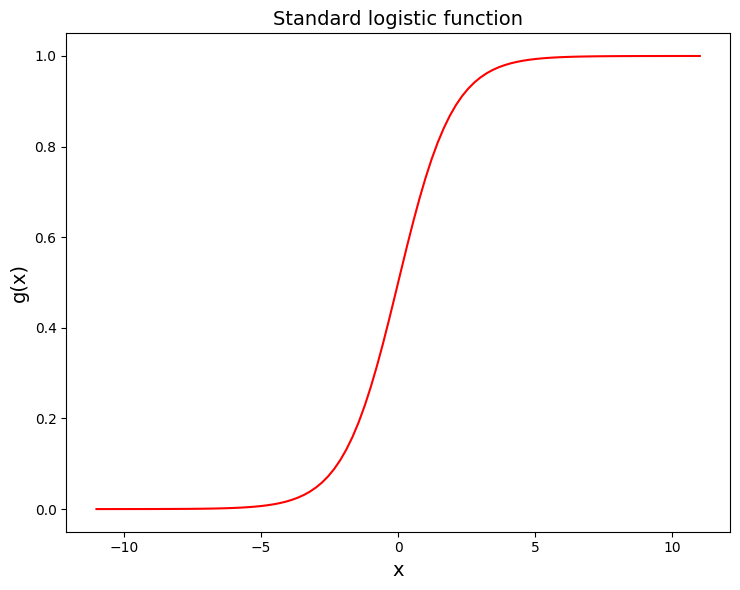

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load Iris dataset
def load_iris_data():
    iris = load_iris()
    X = iris.data[:, :2]  # Using only two features for visualization
    y = (iris.target != 0).astype(int)  # Binary classification: Setosa vs Non-Setosa
    return X, y

def logistic(x):
    y = 1 / (1 + np.exp(-x))
    return y

# Plotting the logistic function
plt.figure(figsize = (7.5, 6))
x = np.linspace(-11, 11, 100)
print(x)
plt.plot(x, logistic(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

log_loss(0, 0.6) = 0.916290731874155
log_loss(1, 0.4) = 0.916290731874155
log_loss(1, 0.8) = 0.2231435513142097
log_loss(0, 0.2) = 0.2231435513142097


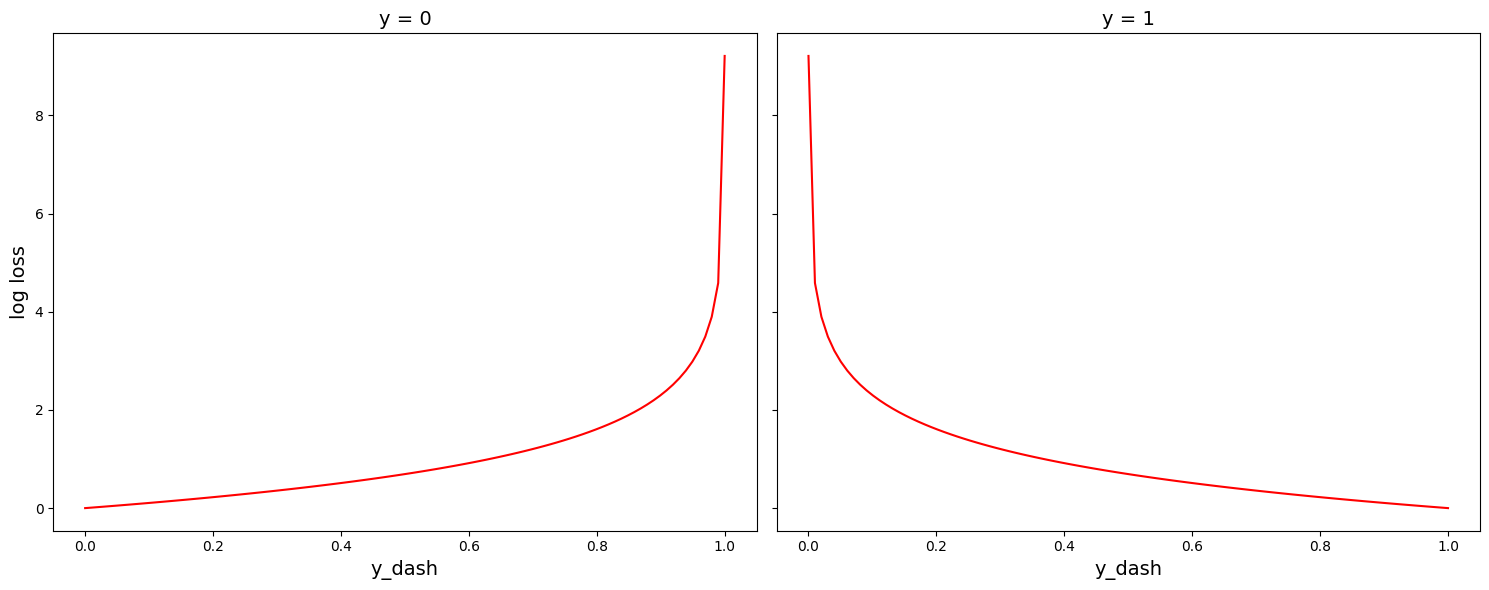

In [ ]:
# Log loss
def log_loss(y, y_dash):
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 1, 0.4
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 1, 0.8
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 0, 0.2
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

#Logistic Regression from Library

Accuracy: 1.00%


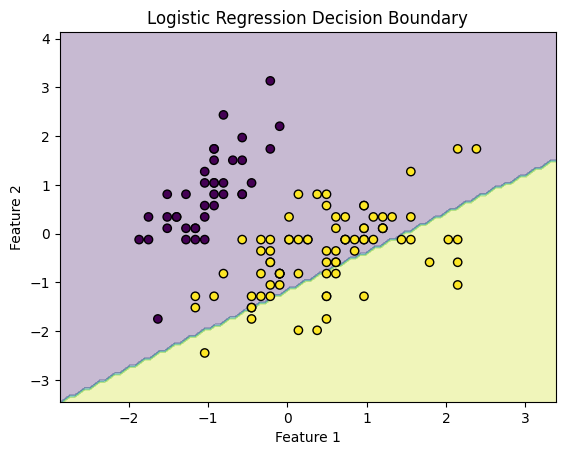

In [ ]:
# Load Iris dataset
def load_iris_data():
    iris = load_iris()
    X = iris.data[:, :2]  # Using only two features for visualization
    y = (iris.target != 0).astype(int)  # Binary classification: Setosa vs Non-Setosa
    return X, y

# Load and preprocess data
X, y = load_iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid = scaler.transform(grid)
    probs = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, probs, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, model)

#Sigmoid, Tanh, Relu Function

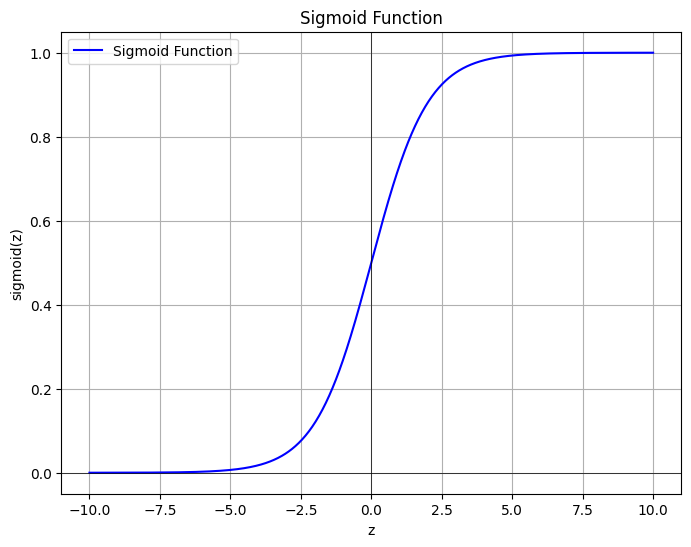

In [ ]:
# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plotting the Sigmoid function
z_values = np.linspace(-10, 10, 1000)
sigmoid_values = sigmoid(z_values)

plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label='Sigmoid Function', color='b')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend(loc='best')
plt.show()

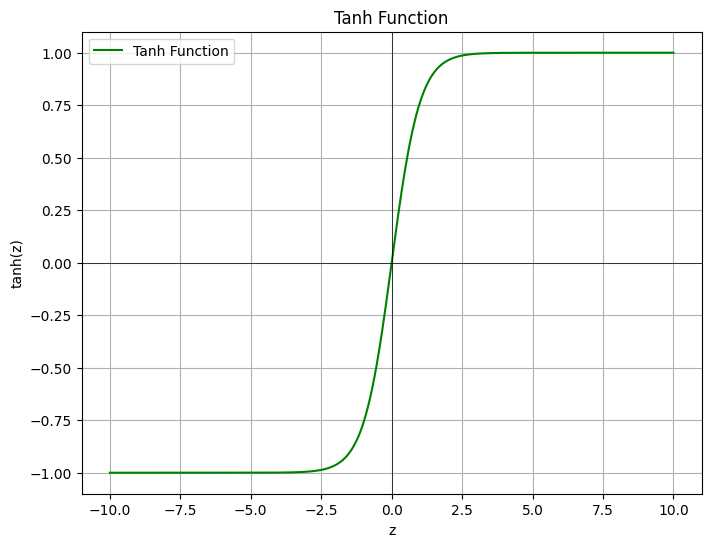

In [ ]:
# Define the tanh activation function
def tanh(z):
    return np.tanh(z)

# Plotting the Tanh function
tanh_values = tanh(z_values)

plt.figure(figsize=(8, 6))
plt.plot(z_values, tanh_values, label='Tanh Function', color='g')
plt.title('Tanh Function')
plt.xlabel('z')
plt.ylabel('tanh(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend(loc='best')
plt.show()


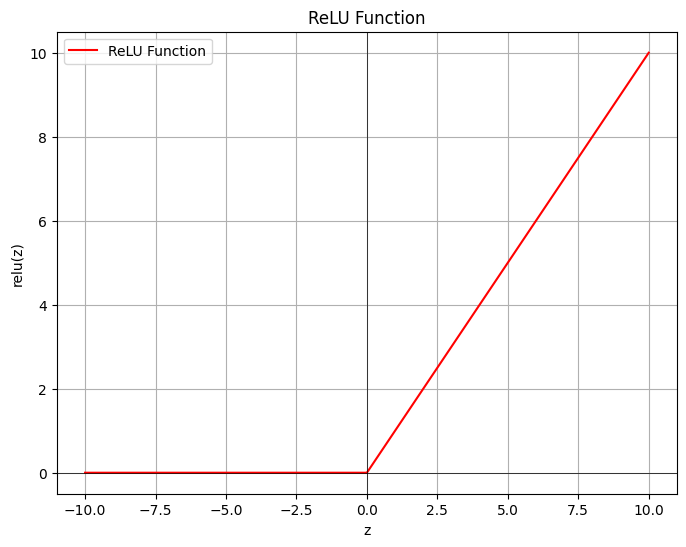

In [ ]:
# Define the ReLU activation function
def relu(z):
    return np.maximum(0, z)

# Plotting the ReLU function
relu_values = relu(z_values)

plt.figure(figsize=(8, 6))
plt.plot(z_values, relu_values, label='ReLU Function', color='r')
plt.title('ReLU Function')
plt.xlabel('z')
plt.ylabel('relu(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend(loc='best')
plt.show()

#Log Loss for vector code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris

# Softmax Activation Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss for Multiclass Classification
def compute_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Gradient Descent for Softmax Regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]  # Number of training examples
    for epoch in range(epochs):
        # Compute predictions
        z = np.dot(X, weights)
        predictions = softmax(z)

        # Compute gradients
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Compute and print loss every 100 epochs
        if epoch % 100 == 0:
            loss = compute_cross_entropy_loss(y, predictions)
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}")

    return weights

# Load predefined Iris dataset
def load_iris_data():
    iris = load_iris()
    X = iris.data  # Using all features
    y = iris.target  # Target labels (Iris species)
    return X, y

# Load the data
X, y = load_iris_data()

# One-hot encode the target labels for multiclass classification
encoder = OneHotEncoder(sparse_output=False)  # Updated from sparse=False
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add an intercept term (bias) to the features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights (for 3 output classes)
num_classes = y.shape[1]
weights = np.zeros((X_train.shape[1], num_classes))

# Train the model using Gradient Descent
learning_rate = 0.1
epochs = 1000
weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Make predictions on the test set
z_test = np.dot(X_test, weights)
y_test_pred_prob = softmax(z_test)  # Get class probabilities
y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Convert to class labels
y_test_true = np.argmax(y_test, axis=1)  # True class labels

# Compute test loss and accuracy
test_loss = compute_cross_entropy_loss(y_test, y_test_pred_prob)
accuracy = np.mean(y_test_pred == y_test_true)

print(f"\nTest Cross-Entropy Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Cross-Entropy Loss: 1.0986
Epoch 100, Cross-Entropy Loss: 0.3196
Epoch 200, Cross-Entropy Loss: 0.2554
Epoch 300, Cross-Entropy Loss: 0.2174
Epoch 400, Cross-Entropy Loss: 0.1912
Epoch 500, Cross-Entropy Loss: 0.1721
Epoch 600, Cross-Entropy Loss: 0.1575
Epoch 700, Cross-Entropy Loss: 0.1461
Epoch 800, Cross-Entropy Loss: 0.1368
Epoch 900, Cross-Entropy Loss: 0.1292

Test Cross-Entropy Loss: 0.1433
Test Accuracy: 0.9667
